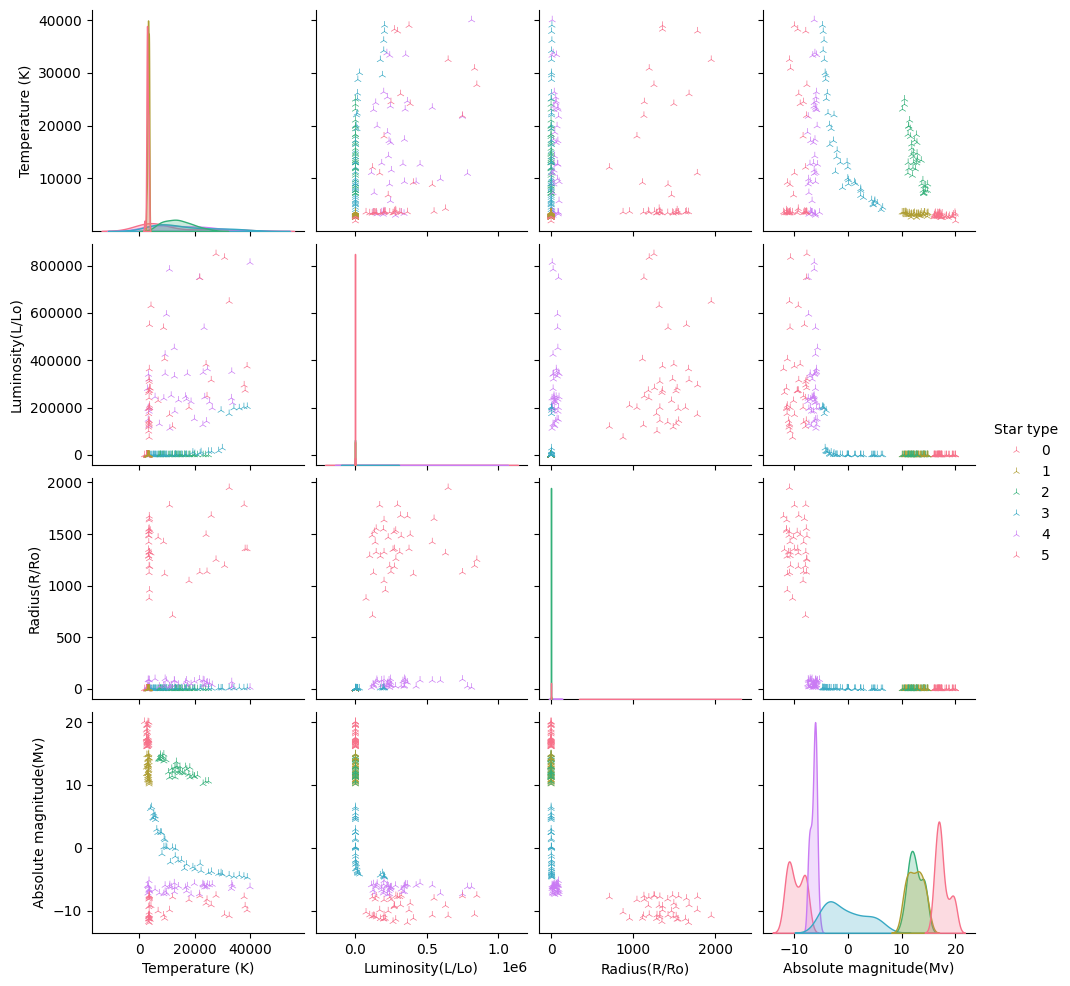

In [1]:
import pandas as pd
import seaborn as sb
import random as rd
import math
import matplotlib.pyplot as plt
#https://www.kaggle.com/datasets/deepu1109/star-dataset

dane=pd.read_csv('.\\6 class.csv')



#Brown Dwarf -> Star Type = 0
#Red Dwarf -> Star Type = 1
#White Dwarf-> Star Type = 2
#Main Sequence -> Star Type = 3
#Supergiant -> Star Type = 4
#Hypergiant -> Star Type = 5

sb.pairplot(dane,hue="Star type",markers="2",palette="husl")

#sb.violinplot(y="Star type",x="Temperature (K)",data=dane,inner="quartille")

def normalizacja(tren,test):
    lista = dane.values.tolist()
       
    for i in lista:
        i.pop(5)

    for i in range(len(lista)):
        match(lista[i][5]):
            case("O"):
                lista[i][5]=0
            case("B"):
                lista[i][5]=1
            case("A"):
                lista[i][5]=2
            case("F"):
                lista[i][5]=3
            case("G"):
                lista[i][5]=4
            case("K"):
                lista[i][5]=5
            case("M"):
                lista[i][5]=6


    for i in range(len(lista)):
        match(lista[i][4]):
            case(0):
                lista[i].append("BrownDwarf")
                lista[i].pop(4)
            case(1):
                lista[i].append("RedDwarf")
                lista[i].pop(4)
            case(2):
                lista[i].append("WhiteDwarf")
                lista[i].pop(4)
            case(3):
                lista[i].append("MainSequence")
                lista[i].pop(4)
            case(4):
                lista[i].append("Supergiant")
                lista[i].pop(4)
            case(5):
                lista[i].append("Hypergiant")
                lista[i].pop(4)
    
    # Normalizacja:
    ma=[-1000000 for i in range(len(lista[0])-1)]
    mi=[10000000 for i in range(len(lista[0])-1)]
    #print(mi,ma)    #ma=MAX    mi=MIN
     
    for i in range(len(lista)):
        for j in range(len(lista[0])-1):
            if(ma[j]<lista[i][j]):
                ma[j]=lista[i][j]
            if(mi[j]>lista[i][j]):
                mi[j]=lista[i][j]
    
    for i in range(len(lista)):
        for j in range(len(lista[0])-1):
            lista[i][j]=(lista[i][j]-mi[j])/(ma[j]-mi[j])
    #print(mi,ma)

    #Podzial bazy na czesc ktora zna i ta ktora trzeba skategoryzowac
    for i in range(x):  
        r=rd.randint(0,len(lista)-1)
        tren.append(lista[r])
        lista.pop(r)

    test=lista.copy()
    lista=[]
    return [test,tren]
    
def uczenie(k,ep):
    ac=0
    
    #porownywanie sasiadow
    for j in range(len(test)):
        S=[]#Sasiedzi
        #print(S)
        for i in range(len(tren)):
            tem=math.sqrt(pow(tren[i][0]-test[j][0],2)+pow(tren[i][1]-test[j][1],2)+pow(tren[i][2]-test[j][2],2)+pow(tren[i][3]-test[j][3],2)+pow(tren[i][4]-test[j][4],2))
            S.append([tem,i,tren[i][ODP]])
            #print(tem)

        #print(j,test[j])
        S.sort()

        #odcinanie listy (opcjonalne)
        L=[]
        for l in range(k):
            L.append(S[l])
        S=L.copy()
        L=[]

        #zliczanie nazw
        Naz=[S[0][2],1]
        for l in range(1,k):
            if(S[l][2] in Naz):
                Naz[Naz.index(S[l][2])+1]+=1
            else:
                Naz.append(S[l][2])
                Naz.append(1)
                
        #print("S",S)
        #print("Naz",Naz)
        
        #zliczanie najwiekszej liczby
        for l in range(k):
            if(Naz.count(k-l)>0):
                break

        #okreslanie wyniku
        wyn=""
        if(Naz.count(k-l)==1):
            wyn=Naz[Naz.index(k-l)-1]
        else:
            r=rd.randint(1,Naz.count(k-l))
            for m in range(r):
                wyn=Naz[Naz.index(k-l)-1]
                del Naz[Naz.index(k-l)]
                
        #print(wyn,test[j][ODP])
                
        #Zliczanie accuracy
        if(wyn==test[j][ODP]):
            ac+=1
        #print("Acc: ",ac,len(test))

    
    #print("Epoka",ep,":",ac/len(test))    
    #print("\n")
    return ((ac/len(test))*100)



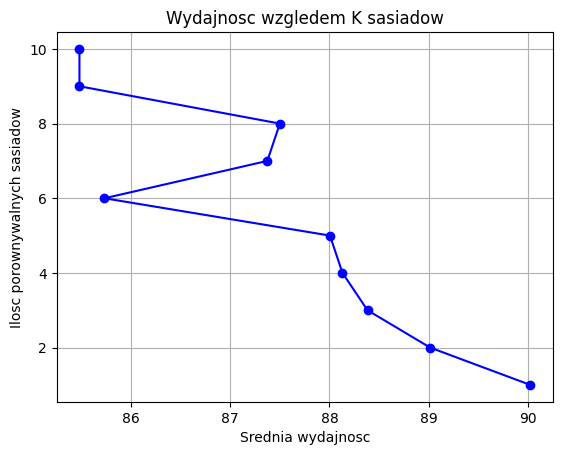

In [2]:
x=len(dane)
x=round(x*0.7)
ODP=5;
wyniki=[]

for k in range(1,11):#ile sasiadow
    #print("K=",k)
    wyniki.append([k])
    for ep in range(1,11):#ile epok
        tren=[]
        test=[]
        test,tren=normalizacja(tren,test)
        wyniki[k-1].append(uczenie(k,ep))

        
        

#print(wyniki)
for i in range(len(wyniki)):
    tem=0
    for j in range(1,len(wyniki[i])):
        tem=tem+wyniki[i][j]
    tem=tem/len(wyniki[i])
    wyniki[i]=[wyniki[i][0],tem]
    
#print(wyniki)

x_data = [item[1] for item in wyniki]
y_data = [item[0] for item in wyniki]

#print(y_data)
plt.plot(x_data, y_data, marker='o', linestyle='-', color='b')
plt.title('Wydajnosc wzgledem K sasiadow')
plt.xlabel('Srednia wydajnosc')
plt.ylabel('Ilosc porownywalnych sasiadow')
plt.grid(True)
plt.show()